In [9]:
"""Google Vision OCR 테스트 노트북

Google Cloud Vision API를 사용하여 고양이 건강검진 이미지에서 텍스트를 추출합니다.
"""

import sys
import time
import warnings
from pathlib import Path

# Python 버전 경고 무시 (Google API Core)
warnings.filterwarnings("ignore", category=FutureWarning, module="google.api_core._python_version_support")

# 프로젝트 루트 추가
PROJECT_ROOT = Path(__file__).resolve().parents[2] if "__file__" in globals() else Path.cwd().parents[1]
sys.path.insert(0, str(PROJECT_ROOT))

# Google Cloud 인증 정보 설정
import os
credentials_path = PROJECT_ROOT / ".credentials" / "google-vision-key.json"
if credentials_path.exists():
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = str(credentials_path)
    print(f"✅ Google Cloud 인증 정보 설정 완료: {credentials_path.name}")
else:
    print(f"⚠️  인증 파일을 찾을 수 없습니다: {credentials_path}")
    print("   docs/API_KEYS_SETUP.md를 참고하여 Google Cloud Vision API 키를 설정하세요.")

from src.services.ocr.google_vision import GoogleVisionOCR
from src.utils.images import load_image
from PIL import Image
from IPython.display import display


✅ Google Cloud 인증 정보 설정 완료: google-vision-key.json


In [11]:
# OCR 서비스 초기화
try:
    ocr = GoogleVisionOCR()
    print("✅ Google Vision OCR 초기화 완료")
except Exception as e:
    print(f"❌ OCR 초기화 실패: {e}")
    print("\n해결 방법:")
    print("1. .credentials/google-vision-key.json 파일이 존재하는지 확인")
    print("2. docs/API_KEYS_SETUP.md 참고하여 Google Cloud 설정 확인")
    raise


✅ Google Vision OCR 초기화 완료


✅ 이미지 로드 완료: 20241106_1.jpg
   크기: 794 x 1123 px


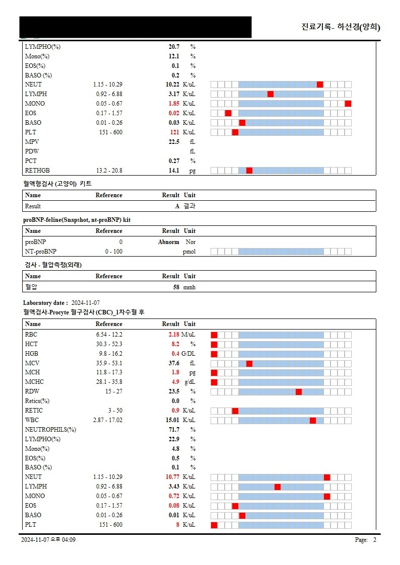


⏱️  처리 시간: 50.94초
📊 텍스트 길이: 1043 글자
📦 텍스트 블록: 285개

📄 추출된 텍스트
  1 │ |LYMPHO(%)
  2 │ Mono(%)
  3 │ 20.7 %
  4 │ 12.1
  5 │ %
  6 │ EOS(%)
  7 │ 0.1
  8 │ %
  9 │ BASO (%)
 10 │ 0.2 %
 11 │ NEUT
 12 │ 1.15 10.29
 13 │ 10.22 K/UL
 14 │ LYMPH
 15 │ 0.92 -6.88
 16 │ 3.17 K/UL
 17 │ MONO
 18 │ 0.05 -0.67
 19 │ 1.85 K/uL
 20 │ EOS
 21 │ 0.17 -1.57
 22 │ 0.02 K/uL
 23 │ BASO
 24 │ 0.01 -0.26
 25 │ 0.03 K/uL
 26 │ PLT
 27 │ 151-600
 28 │ 121 K/UL
 29 │ MPV
 30 │ 22.5
 31 │ fL
 32 │ PDW
 33 │ FL
 34 │ PCT
 35 │ 0.27
 36 │ %
 37 │ RETHGB
 38 │ 13.2 20.8
 39 │ 14.1
 40 │ Pg
 41 │ 혈액형검사 (고양이) 키트
 42 │ Name
 43 │ Reference
 44 │ Result
 45 │ Result Unit
 46 │ A 결과
 47 │ proBNP-feline(Snapshot, nt-proBNP) kit
 48 │ Name
 49 │ Reference
 50 │ Result Unit
 51 │ proBNP
 52 │ 0
 53 │ Abnorm Nor
 54 │ NT-proBNP
 55 │ 0-100
 56 │ pmol
 57 │ 검사- 혈압측정(외래)
 58 │ Name
 59 │ Reference
 60 │ Result Unit
 61 │ 혈압
 62 │ 58 mmh
 63 │ Laboratory date: 2024-11-07
 64 │ 혈액검사-Procyte 혈구검사(CBC)_1차수혈 후
 65 │ Name
 66 │

In [12]:
# 다른 이미지 파일명으로 변경
image_filename = "20241106_1.jpg"  # 원하는 이미지 파일명으로 변경

image_path = PROJECT_ROOT / "tests" / "fixtures" / "images" / image_filename

if not image_path.exists():
    print(f"⚠️  이미지를 찾을 수 없습니다: {image_path}")
else:
    image = load_image(image_path)
    print(f"✅ 이미지 로드 완료: {image_path.name}")
    print(f"   크기: {image.size[0]} x {image.size[1]} px")

    display(image.resize((400, int(400 * image.size[1] / image.size[0]))))

    # OCR 수행
    start_time = time.time()
    result = ocr.extract_text(image)
    elapsed_time = time.time() - start_time

    print(f"\n⏱️  처리 시간: {elapsed_time:.2f}초")
    print(f"📊 텍스트 길이: {len(result.text)} 글자")
    print(f"📦 텍스트 블록: {result.metadata.get('num_blocks', 0)}개")

    print("\n📄 추출된 텍스트")
    print("=" * 80)
    lines = result.text.strip().split("\n")
    for i, line in enumerate(lines, 1):
        if line.strip():
            print(f"{i:3d} │ {line}")
    print("=" * 80)
